# Title - Creating light curves using aperture photometry

# Problem Statement
Creating accurate light curves through  aperture photometry remains a challenge for amateur astronomers and researchers due to the lack of user-friendly and accessible tools. Simplifying this process is crucial for enabling more contributions to astronomy.

In [1]:
pip install lightkurve

  Obtaining dependency information for lightkurve from https://files.pythonhosted.org/packages/a8/20/e5905fd2ff73cc08243821e1c6825a6f1492b95ac47abe6f809f86b8b2fb/lightkurve-2.4.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/4.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.5 MB 1.4 MB/s eta 0:00:04
      --------------------------------------- 0.1/4.5 MB 991.0 kB/s eta 0:00:05
     - -------------------------------------- 0.1/4.5 MB 1.0 MB/s eta 0:00:05
     - -------------------------------------- 0.2/4.5 MB 1.1 MB/s eta 0:00:05
     - -------------------------------------- 0.2/4.5 MB 1.1 MB/s eta 0:00:04
     -- ------------------------------------- 0.3/4.5 MB 1.1 MB/s eta 0:00:04
     -- ------------------------------------- 0.3/4.5 MB 1.1 MB/s eta 0:00:04
     --- ------------------------------------ 0.4/4.5 MB 1.1 MB/s eta 0:00:04
     --- ------------------------------------ 0.4/4.5 MB 1.2 MB/s eta 0:00:04
     --- -----------

In [2]:
import lightkurve as lk
import numpy as np
%matplotlib inline

cadence -refers to the timing and frequency at which observations or measurements are made for a specific target or region of the sky.
long," it typically means that the observations are taken at relatively infrequent intervals or over an extended period of time between consecutive data points.

In [3]:
tpf = lk.search_targetpixelfile("KIC 2437317", author="Kepler", cadence="long", quarter=10).download(quality_bitmask="hard")


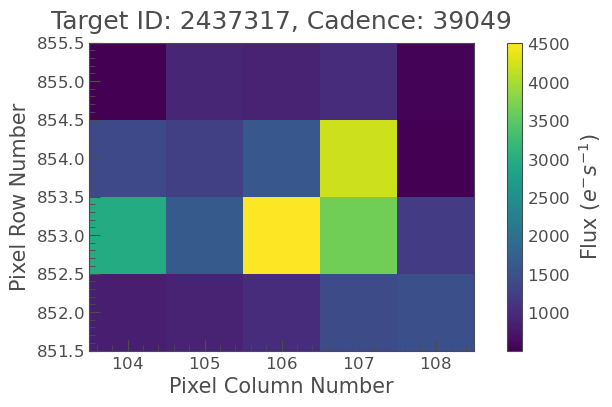

In [4]:
tpf.plot();


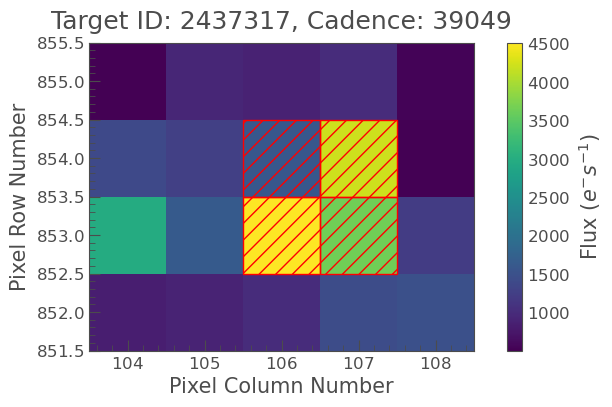

In [5]:
tpf.plot(aperture_mask='pipeline');


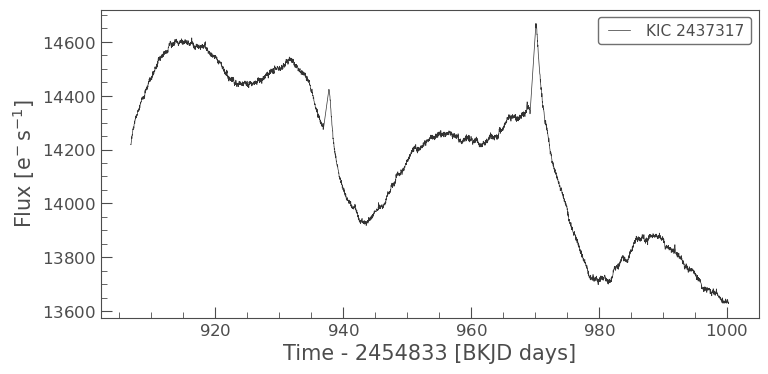

In [6]:
lc = tpf.to_lightcurve(aperture_mask="pipeline")
lc.plot();

Adjusting the aperture
'pipeline': this is the default option, which will return the same as above.

'threshold': select all pixels which have a flux higher than 3 standard deviations above a median brightness.

'all': use every pixel in the frame for photometry.

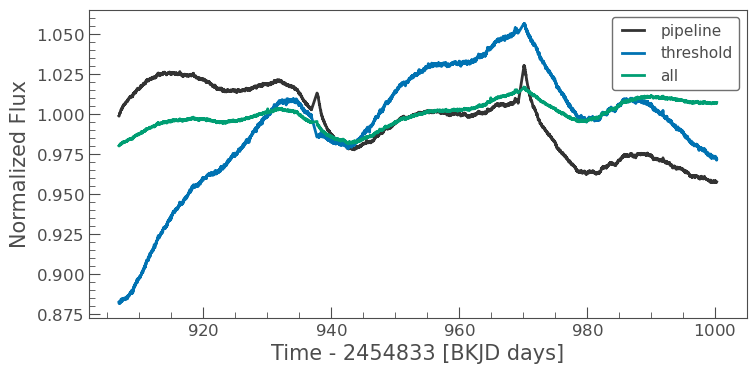

In [7]:
ax = tpf.to_lightcurve(aperture_mask='pipeline').normalize().plot(label='pipeline', linewidth=2);
tpf.to_lightcurve(aperture_mask='threshold').normalize().plot(ax=ax, label='threshold', linewidth=2);
tpf.to_lightcurve(aperture_mask='all').normalize().plot(ax=ax, label='all', linewidth=2);

This is Lightkurve’s default 3 standard deviations threshold mask

In [8]:
tpf.create_threshold_mask()

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False,  True, False],
       [False, False, False, False, False]])

In [9]:
custom_threshold_mask = tpf.create_threshold_mask(threshold=1)
custom_threshold_mask

array([[False, False, False, False, False],
       [False, False,  True,  True, False],
       [False, False,  True,  True, False],
       [False, False, False, False, False]])

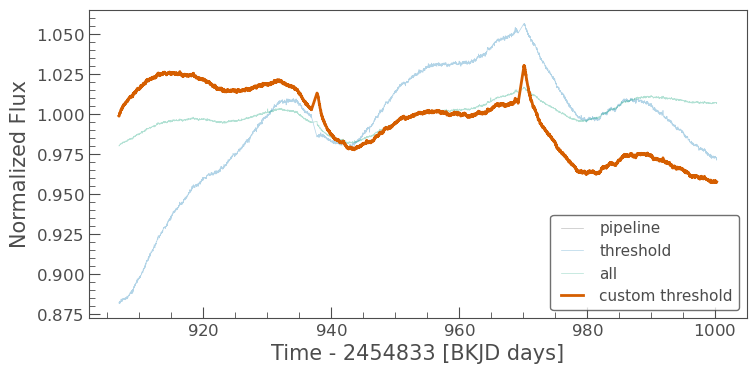

In [10]:
ax = tpf.to_lightcurve(aperture_mask='pipeline').normalize().plot(label='pipeline', alpha=.3)
tpf.to_lightcurve(aperture_mask='threshold').normalize().plot(ax=ax, label='threshold', alpha=.3)
tpf.to_lightcurve(aperture_mask='all').normalize().plot(ax=ax, label='all', alpha=.3)
tpf.to_lightcurve(aperture_mask=custom_threshold_mask).normalize().plot(ax=ax, label='custom threshold', linewidth=2);

# conclusion :
creating light curves using aperture photometry is a fundamental technique in astronomy for measuring the brightness variations of celestial objects over time. This method involves summing up the light from selected pixels within an aperture and is widely used for studying stars, exoplanets, variable stars, and other astronomical phenomena. Light curves offer insights into the behavior and properties of these objects, providing valuable data for scientific research and discovery in the field of astronomy.

Reference - https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=koiapp&constraint=pp_host_prob_score%3E0.3

https://exoplanetarchive.ipac.caltech.edu/docs/data.html